In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import validation_curve 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
data=pd.read_csv("wineQuality_processed.csv")
data_temp=data
X=data.drop(['quality'],axis=1)
y=data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
X_train_33, X_test_33, y_train_33, y_test_33 = train_test_split(X, y, test_size=0.33, random_state=30)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=30)

In [17]:
data.tail(70)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,sf_ratio,type,quality
6427,0.272727,0.406667,0.048193,0.023006,0.089701,0.105991,0.172932,0.542636,0.213483,0.318841,0.940736,0,1
6428,0.282362,0.240000,0.054217,0.024540,0.089701,0.027650,0.141315,0.386353,0.264045,0.478261,0.571984,0,1
6429,0.282362,0.416667,0.060241,0.033742,0.119601,0.050691,0.177366,0.386353,0.247191,0.318841,0.529183,0,0
6430,0.280992,0.300000,0.078313,0.021472,0.081395,0.036866,0.166185,0.379845,0.258427,0.275362,0.953307,0,1
6431,0.347107,0.206667,0.180723,0.019939,0.107973,0.179724,0.193946,0.519380,0.219101,0.144928,0.429313,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.346667,0.048193,0.021472,0.134551,0.087558,0.150183,0.565891,0.202247,0.362319,0.844358,0,0
6493,0.173554,0.313333,0.060241,0.024540,0.088040,0.103687,0.154425,0.620155,0.174840,0.463768,0.889220,0,1
6494,0.206612,0.286667,0.078313,0.026074,0.111296,0.078341,0.166377,0.542636,0.297753,0.434783,0.841634,0,1
6495,0.173554,0.376667,0.072289,0.021472,0.109635,0.087558,0.161172,0.658915,0.275281,0.318841,0.844358,0,0


In [3]:
#Function to get the test report for each model
def test_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_test)
        return(classification_report(y_test,prediction))
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        return(classification_report(y_test_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        return(classification_report(y_test_33,prediction))
def train_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_train)
        return(classification_report(y_train,prediction))
    if test_size==0.20:
        prediction=model.predict(X_train_20)
        return(classification_report(y_train_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_train_33)
        return(classification_report(y_train_33,prediction))
#Function to get the f1-score,precision
def f_p_r(model,test_size,name):
    global reps
    if test_size==0.20:
        predicts_20=model.predict(X_test_20)
        reps=classification_report(y_test_20,predicts_20,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.20 for ",name," Recall:",recal)
        print("With test_size=0.20 for ",name," f1 score:",f1)
        print("With test_size=0.20 for ",name," precision:",precs)
    if test_size==0.25:
        predicts=model.predict(X_test)
        reps=classification_report(y_test,predicts,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.25 for ",name," Recall:",recal)
        print("With test_size=0.25 for ",name," f1 score:",f1)
        print("With test_size=0.25 for ",name," precision:",precs)
    if test_size==0.33:
        predicts_33=model.predict(X_test_33)
        reps=classification_report(y_test_33,predicts_33,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.33 for ",name," Recall:",recal)
        print("With test_size=0.33 for ",name," f1 score:",f1)
        print("With test_size=0.33 for ",name," precision:",precs)
#Function to get the confusion matrix
def confuse_mat(model,test_size):
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        conmat=confusion_matrix(y_test_20,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.25:
        prediction=model.predict(X_test)
        conmat=confusion_matrix(y_test,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        conmat=confusion_matrix(y_test_33,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
#Function to plot the R0C curve
def roc_auc(model,name,test_size):
    if test_size==0.20:
        ns_probs = [0 for _ in range(len(y_test_20))]
        prediction_probs_20=model.predict_proba(X_test_20)
        prediction_probs_20 = prediction_probs_20[:, 1]
        ns_auc = roc_auc_score(y_test_20, ns_probs)
        lr_auc=roc_auc_score(y_test_20,prediction_probs_20)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_20, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_20,prediction_probs_20)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.25:
        ns_probs = [0 for _ in range(len(y_test))]
        prediction_probs=model.predict_proba(X_test)
        prediction_probs = prediction_probs[:, 1]
        ns_auc = roc_auc_score(y_test, ns_probs)
        lr_auc=roc_auc_score(y_test,prediction_probs)
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test,prediction_probs)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.33:
        ns_probs = [0 for _ in range(len(y_test_33))]
        prediction_probs_33=model.predict_proba(X_test_33)
        prediction_probs_33 = prediction_probs_33[:, 1]
        ns_auc = roc_auc_score(y_test_33, ns_probs)
        lr_auc=roc_auc_score(y_test_33,prediction_probs_33)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_33, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_33,prediction_probs_33)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))

In [281]:
#Logistic Regression Model
LR_model=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.01,0.1,1,10,100]
LR_grid = dict(solver=solvers,penalty=penalty,C=c_values)
LR_Clf_20=GridSearchCV(LR_model,param_grid=LR_grid,cv=10)
LR_Clf_20.fit(X_train_20,y_train_20)
print("Logistic Regression Model working with test size=0.20")
print("-------------------------------------------")
params_combine_LR_20=pd.concat([pd.DataFrame(LR_Clf_20.cv_results_["params"]),pd.DataFrame(LR_Clf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_LR_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",LR_Clf_20.best_params_)
print("Best accuracy score with test size=0.20: ",LR_Clf_20.best_score_)
print("--------------------------------------------------------------------------------------")
LR_Clf_25=GridSearchCV(LR_model,param_grid=LR_grid,cv=10)
LR_Clf_25.fit(X_train,y_train)
print("Logistic Regression Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_LR_25=pd.concat([pd.DataFrame(LR_Clf_25.cv_results_["params"]),pd.DataFrame(LR_Clf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_LR_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",LR_Clf_25.best_params_)
print("Best accuracy score with test size=0.25: ",LR_Clf_25.best_score_)
print("--------------------------------------------------------------------------------------")
LR_Clf_33=GridSearchCV(LR_model,param_grid=LR_grid,cv=10)
LR_Clf_33.fit(X_train_33,y_train_33)
print("Logistic Regression Model working with test size=0.33")
print("-------------------------------------------")
params_combine_LR_33=pd.concat([pd.DataFrame(LR_Clf_33.cv_results_["params"]),pd.DataFrame(LR_Clf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_LR_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",LR_Clf_33.best_params_)
print("Best accuracy score with test size=0.33: ",LR_Clf_33.best_score_)
print("--------------------------------------------------------------------------------------")

Logistic Regression Model working with test size=0.20
-------------------------------------------
         C penalty     solver  Accuracy
0     0.01      l2  newton-cg  0.646141
1     0.01      l2      lbfgs  0.646141
2     0.01      l2  liblinear  0.646142
3     0.10      l2  newton-cg  0.720808
4     0.10      l2      lbfgs  0.720808
5     0.10      l2  liblinear  0.723502
6     1.00      l2  newton-cg  0.744860
7     1.00      l2      lbfgs  0.744860
8     1.00      l2  liblinear  0.744282
9    10.00      l2  newton-cg  0.744857
10   10.00      l2      lbfgs  0.744857
11   10.00      l2  liblinear  0.744857
12  100.00      l2  newton-cg  0.745243
13  100.00      l2      lbfgs  0.745243
14  100.00      l2  liblinear  0.745243
-------------------------------------------
Best parameter setting with test size=0.20:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy score with test size=0.20:  0.7452434415295687
-------------------------------------------------------------

Best Logistic Regression Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for Logistic Regression with the best parameter settings with test size=0.20


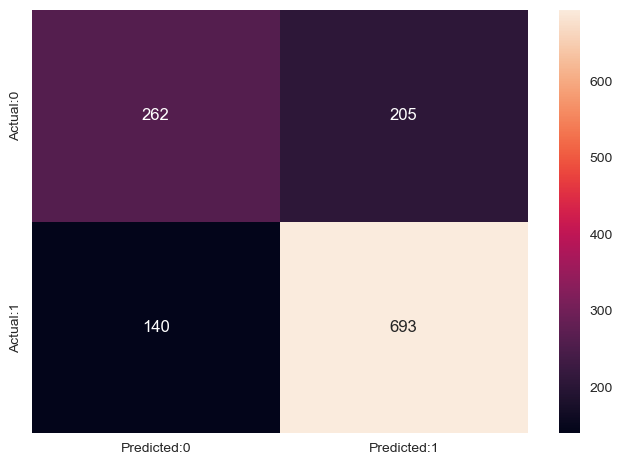

------------------------------------------------------------------
Classification Report for Logistic Regression model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       467
           1       0.77      0.83      0.80       833

    accuracy                           0.73      1300
   macro avg       0.71      0.70      0.70      1300
weighted avg       0.73      0.73      0.73      1300

------------------------------------------------------------------
Classification Report for Logistic Regression model with Train with test size=0.20
              precision    recall  f1-score   support

           0       0.69      0.57      0.63      1917
           1       0.77      0.85      0.81      3280

    accuracy                           0.75      5197
   macro avg       0.73      0.71      0.72      5197
weighted avg       0.74      0.75      0.74      5197

-----------------------------------------------

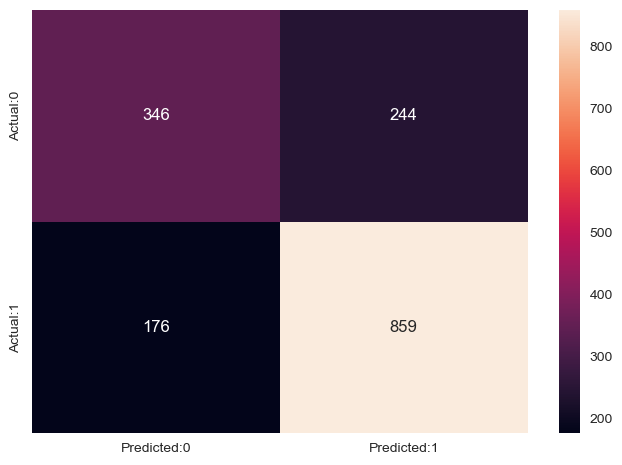

------------------------------------------------------------------
Classification Report for Logistic Regression model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       590
           1       0.78      0.83      0.80      1035

    accuracy                           0.74      1625
   macro avg       0.72      0.71      0.71      1625
weighted avg       0.74      0.74      0.74      1625

------------------------------------------------------------------
Classification Report for Logistic Regression model with Train with test size=0.25
              precision    recall  f1-score   support

           0       0.69      0.57      0.62      1794
           1       0.77      0.85      0.81      3078

    accuracy                           0.75      4872
   macro avg       0.73      0.71      0.72      4872
weighted avg       0.74      0.75      0.74      4872

-----------------------------------------------

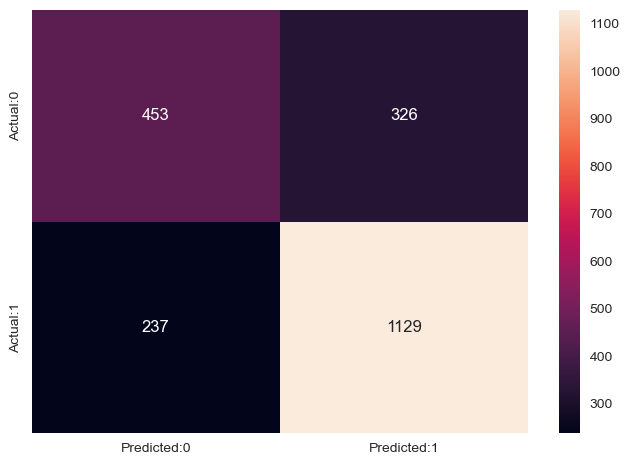

------------------------------------------------------------------
Classification Report for Logistic Regression model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       779
           1       0.78      0.83      0.80      1366

    accuracy                           0.74      2145
   macro avg       0.72      0.70      0.71      2145
weighted avg       0.73      0.74      0.73      2145

------------------------------------------------------------------
Classification Report for Logistic Regression model with Train with test size=0.33
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      1605
           1       0.78      0.84      0.81      2747

    accuracy                           0.75      4352
   macro avg       0.73      0.71      0.72      4352
weighted avg       0.74      0.75      0.74      4352

-----------------------------------------------

In [285]:
#Now using best parameter setting to run the LR model
best_lr_20=LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')
lr_20=best_lr_20.fit(X_train_20,y_train_20)
print("Best Logistic Regression Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for Logistic Regression with the best parameter settings with test size=0.20")
confuse_mat(lr_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Test with test size=0.20")
report=test_report(lr_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Train with test size=0.20")
test_repo=train_report(lr_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_lr_25=LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')
lr_25=best_lr_25.fit(X_train,y_train)
print("Best SVM Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for Logistic Regression with the best parameter settings with test size=0.25")
confuse_mat(lr_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Test with test size=0.25")
report=test_report(lr_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Train with test size=0.25")
test_repo=train_report(lr_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_lr_33=LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')
lr_33=best_lr_33.fit(X_train_33,y_train_33)
print("Best SVM Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for Logistic Regression with the best parameter settings with test size=0.33")
confuse_mat(lr_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Test with test size=0.33")
report=test_report(lr_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Train with test size=0.33")
test_repo=train_report(lr_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")

ROC curve and AUC score for test_size=0.20


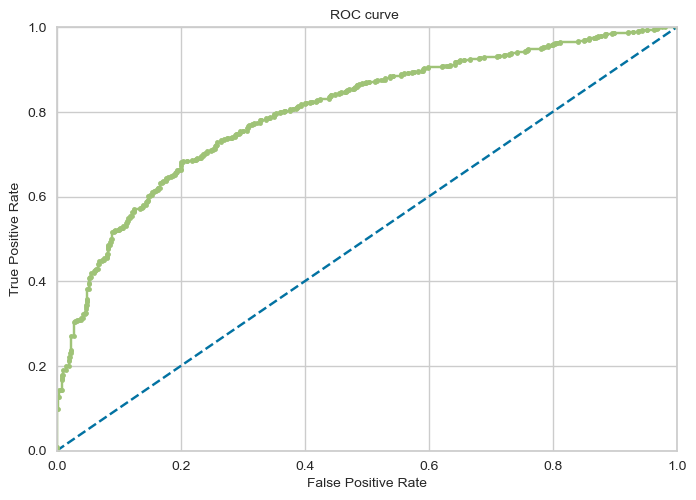

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.801
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.25


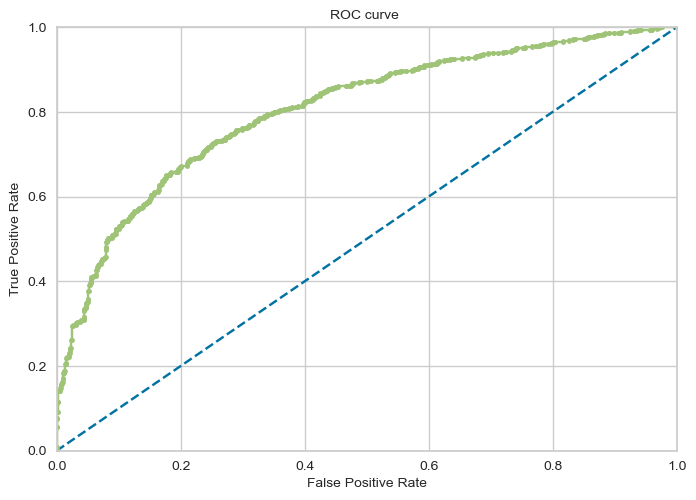

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.805
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.33


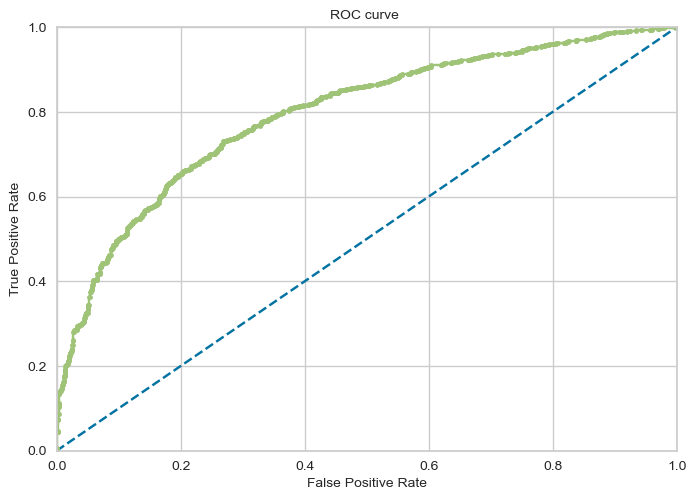

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.795


In [286]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(lr_20,"Logistic Regression",0.20)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.25")
roc_auc(lr_25,"Logistic Regression",0.25)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.33")
roc_auc(lr_33,"Logistic Regression",0.33)

In [287]:
f_p_r(lr_20,0.20,"Logistic Regression")
print("--------------------------------------------------------------------------------------")
f_p_r(lr_25,0.25,"Logistic Regression")
print("--------------------------------------------------------------------------------------")
f_p_r(lr_33,0.33,"Logistic Regression")

With test_size=0.20 for  Logistic Regression  Recall: 0.6964803051841721
With test_size=0.20 for  Logistic Regression  f1 score: 0.7018425928326549
With test_size=0.20 for  Logistic Regression  precision: 0.7117281077906681
--------------------------------------------------------------------------------------
With test_size=0.25 for  Logistic Regression  Recall: 0.7081961843936788
With test_size=0.25 for  Logistic Regression  f1 score: 0.7129284411572706
With test_size=0.25 for  Logistic Regression  precision: 0.7208101902509005
--------------------------------------------------------------------------------------
With test_size=0.33 for  Logistic Regression  Recall: 0.704007747290234
With test_size=0.33 for  Logistic Regression  f1 score: 0.7085857334215884
With test_size=0.33 for  Logistic Regression  precision: 0.7162333781562826


In [169]:
#Linear SVM
linear_svm_model=LinearSVC()
c_vals=[0.01,0.1,1,10,100]
loss_functions=['hinge','squared_hinge']
penalty=['l2']
max_iterations=[1000,2000]
linear_svm_grid=dict(penalty=penalty,loss=loss_functions,C=c_vals,max_iter=max_iterations)
linear_svmClf_20=GridSearchCV(linear_svm_model,param_grid=linear_svm_grid,cv=5)
linear_svmClf_20.fit(X_train_20,y_train_20)
print("Linear SVM Model working with test size=0.20")
print("-------------------------------------------")
params_combine_linear_svm_20=pd.concat([pd.DataFrame(linear_svmClf_20.cv_results_["params"]),pd.DataFrame(linear_svmClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_linear_svm_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",linear_svmClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",linear_svmClf_20.best_score_)
print("--------------------------------------------------------------------------------------")
linear_svmClf_25=GridSearchCV(linear_svm_model,param_grid=linear_svm_grid,cv=5)
linear_svmClf_25.fit(X_train,y_train)
print("Linear SVM Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_linear_svm_25=pd.concat([pd.DataFrame(linear_svmClf_25.cv_results_["params"]),pd.DataFrame(linear_svmClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_linear_svm_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",linear_svmClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",linear_svmClf_25.best_score_)
print("--------------------------------------------------------------------------------------")
linear_svmClf_33=GridSearchCV(linear_svm_model,param_grid=linear_svm_grid,cv=5)
linear_svmClf_33.fit(X_train_33,y_train_33)
print("Linear SVM Model working with test size=0.33")
print("-------------------------------------------")
params_combine_linear_svm_33=pd.concat([pd.DataFrame(linear_svmClf_33.cv_results_["params"]),pd.DataFrame(linear_svmClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_linear_svm_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",linear_svmClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",linear_svmClf_33.best_score_)
print("--------------------------------------------------------------------------------------")

Linear SVM Model working with test size=0.20
-------------------------------------------
         C           loss  max_iter penalty  Accuracy
0     0.01          hinge      1000      l2  0.631133
1     0.01          hinge      2000      l2  0.631133
2     0.01  squared_hinge      1000      l2  0.722150
3     0.01  squared_hinge      2000      l2  0.722150
4     0.10          hinge      1000      l2  0.729270
5     0.10          hinge      2000      l2  0.729270
6     0.10  squared_hinge      1000      l2  0.744663
7     0.10  squared_hinge      2000      l2  0.744663
8     1.00          hinge      1000      l2  0.749283
9     1.00          hinge      2000      l2  0.749475
10    1.00  squared_hinge      1000      l2  0.745817
11    1.00  squared_hinge      2000      l2  0.745817
12   10.00          hinge      1000      l2  0.752360
13   10.00          hinge      2000      l2  0.751398
14   10.00  squared_hinge      1000      l2  0.745433
15   10.00  squared_hinge      2000      l2  0.

Best SVM Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for SVM with the best parameter settings with test size=0.20


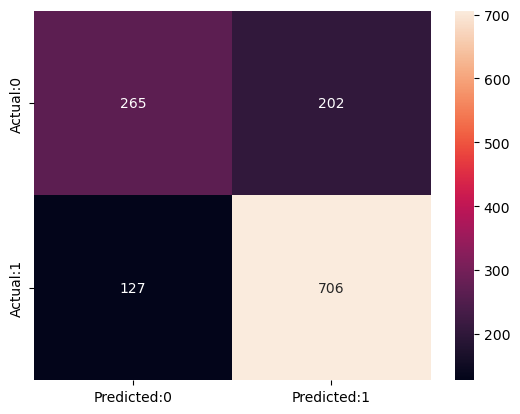

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       467
           1       0.78      0.85      0.81       833

    accuracy                           0.75      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.75      0.74      1300

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.20
              precision    recall  f1-score   support

           0       0.71      0.56      0.63      1917
           1       0.77      0.87      0.82      3280

    accuracy                           0.75      5197
   macro avg       0.74      0.71      0.72      5197
weighted avg       0.75      0.75      0.75      5197

-------------------------------------------------------------------------------

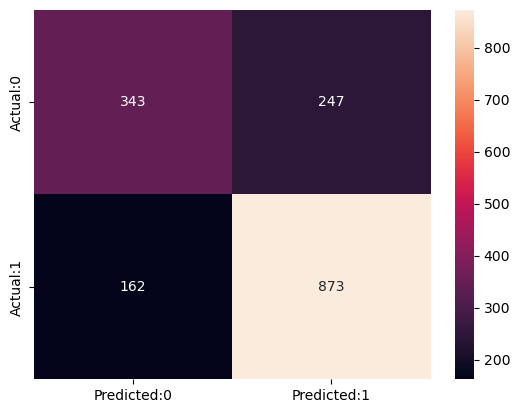

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.68      0.58      0.63       590
           1       0.78      0.84      0.81      1035

    accuracy                           0.75      1625
   macro avg       0.73      0.71      0.72      1625
weighted avg       0.74      0.75      0.74      1625

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.25
              precision    recall  f1-score   support

           0       0.70      0.56      0.62      1794
           1       0.77      0.86      0.81      3078

    accuracy                           0.75      4872
   macro avg       0.74      0.71      0.72      4872
weighted avg       0.75      0.75      0.74      4872

-------------------------------------------------------------------------------

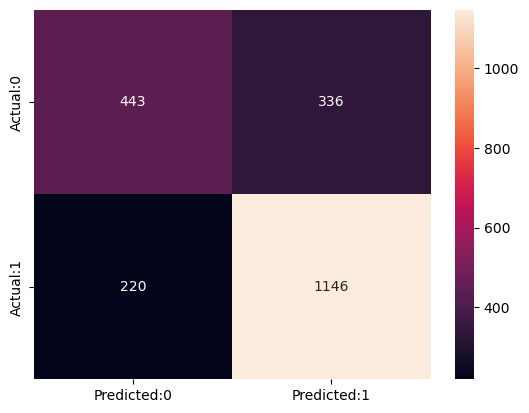

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.67      0.57      0.61       779
           1       0.77      0.84      0.80      1366

    accuracy                           0.74      2145
   macro avg       0.72      0.70      0.71      2145
weighted avg       0.74      0.74      0.74      2145

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.33
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      1605
           1       0.77      0.86      0.81      2747

    accuracy                           0.75      4352
   macro avg       0.74      0.71      0.72      4352
weighted avg       0.75      0.75      0.75      4352

-------------------------------------------------------------------------------

In [171]:
#Best Parameter Setting
best_linear_svm_20=LinearSVC(C=10,loss='hinge',penalty='l2',max_iter=2000,random_state=101)
linear_svm_20=best_linear_svm_20.fit(X_train_20,y_train_20)
print("Best SVM Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.20")
confuse_mat(linear_svm_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.20")
report=test_report(linear_svm_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.20")
test_repo=train_report(linear_svm_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_linear_svm_25=LinearSVC(C=100,loss='hinge',penalty='l2',max_iter=2000,random_state=101)
linear_svm_25=best_linear_svm_25.fit(X_train,y_train)
print("Best SVM Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.25")
confuse_mat(linear_svm_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.25")
report=test_report(linear_svm_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.25")
test_repo=train_report(linear_svm_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_linear_svm_33=LinearSVC(C=100,loss='hinge',penalty='l2',max_iter=2000,random_state=101)
linear_svm_33=best_linear_svm_33.fit(X_train_33,y_train_33)
print("Best SVM Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.33")
confuse_mat(linear_svm_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.33")
report=test_report(linear_svm_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.33")
test_repo=train_report(linear_svm_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")

In [194]:
#Support Vector Machine
svm_model=SVC()
c_vals=[0.01,0.1,1,10]
kernels=['linear','sigmoid','rbf','poly']
poly_degree=[2,3]
gamma_vals=[0.001,0.01,0.1]
max_iterations=[1000,2000]
randomness=[10,100]
probs=True
svm_grid = dict(gamma=gamma_vals,kernel=kernels,C=c_vals,degree=poly_degree,max_iter=max_iterations,random_state=randomness)
svmClf_20=GridSearchCV(svm_model,param_grid=svm_grid,cv=10)
svmClf_20.fit(X_train_20,y_train_20)
print("SVM Model working with test size=0.20")
print("-------------------------------------------")
params_combine_svm_20=pd.concat([pd.DataFrame(svmClf_20.cv_results_["params"]),pd.DataFrame(svmClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_svm_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",svmClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",svmClf_20.best_score_)
print("--------------------------------------------------------------------------------------")
svmClf_25=GridSearchCV(svm_model,param_grid=svm_grid,cv=10)
svmClf_25.fit(X_train,y_train)
print("SVM Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_svm_25=pd.concat([pd.DataFrame(svmClf_25.cv_results_["params"]),pd.DataFrame(svmClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_svm_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",svmClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",svmClf_25.best_score_)
print("--------------------------------------------------------------------------------------")
svmClf_33=GridSearchCV(svm_model,param_grid=svm_grid,cv=10)
svmClf_33.fit(X_train_33,y_train_33)
print("SVM Model working with test size=0.33")
print("-------------------------------------------")
params_combine_svm_33=pd.concat([pd.DataFrame(svmClf_33.cv_results_["params"]),pd.DataFrame(svmClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_svm_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",svmClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",svmClf_33.best_score_)
print("--------------------------------------------------------------------------------------")

SVM Model working with test size=0.20
-------------------------------------------
         C  degree  gamma   kernel  max_iter  random_state  Accuracy
0     0.01       2  0.001   linear      1000            10  0.650954
1     0.01       2  0.001   linear      1000           100  0.650954
2     0.01       2  0.001   linear      2000            10  0.631134
3     0.01       2  0.001   linear      2000           100  0.631134
4     0.01       2  0.001  sigmoid      1000            10  0.653454
..     ...     ...    ...      ...       ...           ...       ...
379  10.00       3  0.100      rbf      2000           100  0.750249
380  10.00       3  0.100     poly      1000            10  0.634020
381  10.00       3  0.100     poly      1000           100  0.634020
382  10.00       3  0.100     poly      2000            10  0.705799
383  10.00       3  0.100     poly      2000           100  0.705799

[384 rows x 7 columns]
-------------------------------------------
Best parameter setting

Best SVM Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for SVM with the best parameter settings with test size=0.20


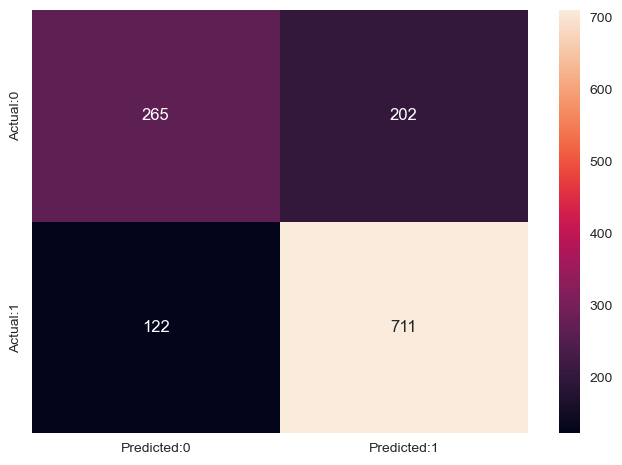

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       467
           1       0.78      0.85      0.81       833

    accuracy                           0.75      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.74      0.75      0.74      1300

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.20
              precision    recall  f1-score   support

           0       0.71      0.56      0.62      1917
           1       0.77      0.87      0.82      3280

    accuracy                           0.75      5197
   macro avg       0.74      0.71      0.72      5197
weighted avg       0.75      0.75      0.74      5197

-------------------------------------------------------------------------------

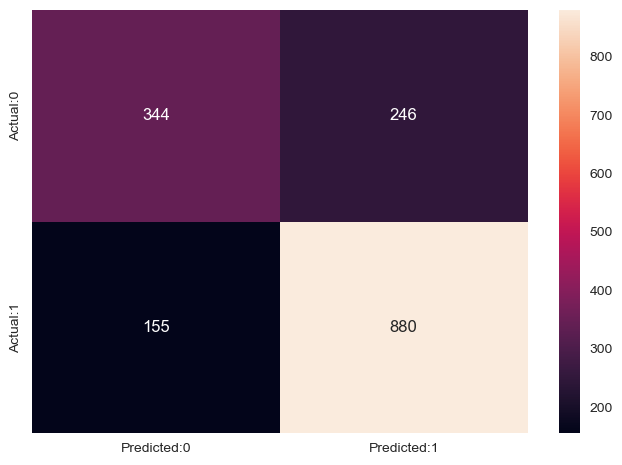

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       590
           1       0.78      0.85      0.81      1035

    accuracy                           0.75      1625
   macro avg       0.74      0.72      0.72      1625
weighted avg       0.75      0.75      0.75      1625

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.25
              precision    recall  f1-score   support

           0       0.71      0.56      0.62      1794
           1       0.77      0.87      0.82      3078

    accuracy                           0.75      4872
   macro avg       0.74      0.71      0.72      4872
weighted avg       0.75      0.75      0.75      4872

-------------------------------------------------------------------------------

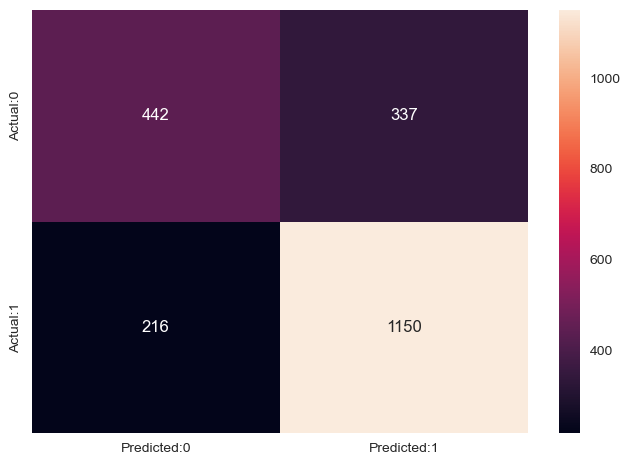

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       779
           1       0.77      0.84      0.81      1366

    accuracy                           0.74      2145
   macro avg       0.72      0.70      0.71      2145
weighted avg       0.74      0.74      0.74      2145

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.33
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1605
           1       0.78      0.86      0.82      2747

    accuracy                           0.76      4352
   macro avg       0.74      0.72      0.73      4352
weighted avg       0.75      0.76      0.75      4352

-------------------------------------------------------------------------------

In [196]:
#Now using the best parameter setting to run SVM
best_svm_20=SVC(C=10,degree=2,gamma=0.1,kernel='rbf',max_iter=2000,random_state=10,probability=True)
svm_20=best_svm_20.fit(X_train_20,y_train_20)
print("Best SVM Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.20")
confuse_mat(svm_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.20")
report=test_report(svm_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.20")
test_repo=train_report(svm_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_svm_25=SVC(C=10,degree=2,gamma=0.1,kernel='rbf',max_iter=2000,random_state=10,probability=True)
svm_25=best_svm_25.fit(X_train,y_train)
print("Best SVM Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.25")
confuse_mat(svm_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.25")
report=test_report(svm_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.25")
test_repo=train_report(svm_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_svm_33=SVC(C=10,degree=2,gamma=0.1,kernel='rbf',max_iter=2000,random_state=10,probability=True)
svm_33=best_svm_33.fit(X_train_33,y_train_33)
print("Best SVM Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.33")
confuse_mat(svm_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.33")
report=test_report(svm_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.33")
test_repo=train_report(svm_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")

ROC curve and AUC score for test_size=0.20


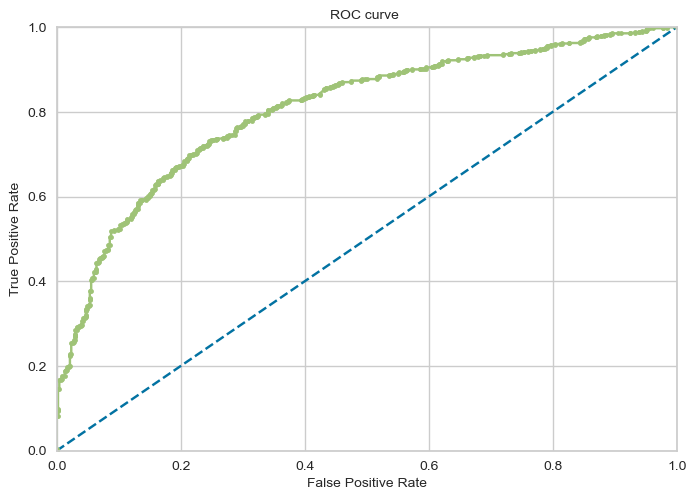

No Skill: ROC AUC=0.500
SVM : ROC AUC=0.806
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.25


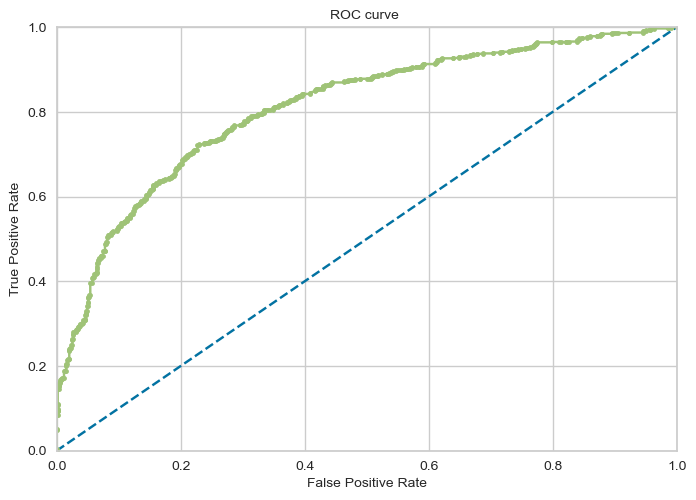

No Skill: ROC AUC=0.500
SVM : ROC AUC=0.811
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.33


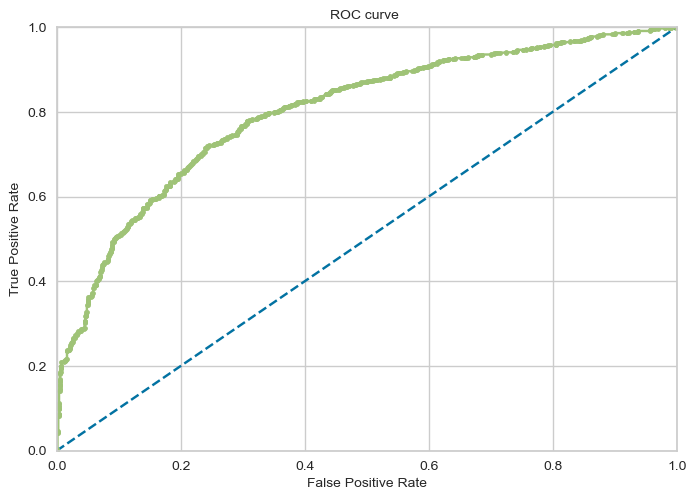

No Skill: ROC AUC=0.500
SVM : ROC AUC=0.800


In [199]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(svm_20,"SVM",0.20)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.25")
roc_auc(svm_25,"SVM",0.25)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.33")
roc_auc(svm_33,"SVM",0.33)

In [273]:
f_p_r(svm_25,0.25,"SVM")

With test_size=0.25 for  SVM  Recall: 0.7166461966756734
With test_size=0.25 for  SVM  f1 score: 0.7231050142160318
With test_size=0.25 for  SVM  precision: 0.7354531442992558


In [202]:
#AdaBoost Algorithm
ada_model=AdaBoostClassifier()
base_estim=[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=3),ExtraTreeClassifier(max_depth=4)]
learn_rate=[0.1,0.2,0.3,0.5]
no_estimators=[100,125,500]
ada_algorithm=['SAMME','SAMME.R']
ada_grid=dict(base_estimator=base_estim,learning_rate=learn_rate,n_estimators=no_estimators,algorithm=ada_algorithm)
adaClf_20=GridSearchCV(ada_model,param_grid=ada_grid,cv=10)
adaClf_20.fit(X_train_20,y_train_20)
print("AdaBoost Model working with test size=0.20")
print("-------------------------------------------")
params_combine_ada_20=pd.concat([pd.DataFrame(adaClf_20.cv_results_["params"]),pd.DataFrame(adaClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_ada_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",adaClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",adaClf_20.best_score_)
print("--------------------------------------------------------------------------------------")
adaClf_25=GridSearchCV(ada_model,param_grid=ada_grid,cv=10)
adaClf_25.fit(X_train,y_train)
print("AdaBoost Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_ada_25=pd.concat([pd.DataFrame(adaClf_25.cv_results_["params"]),pd.DataFrame(adaClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_ada_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",adaClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",adaClf_25.best_score_)
print("--------------------------------------------------------------------------------------")
adaClf_33=GridSearchCV(ada_model,param_grid=ada_grid,cv=10)
adaClf_33.fit(X_train_33,y_train_33)
print("AdaBoost Model working with test size=0.33")
print("-------------------------------------------")
params_combine_ada_33=pd.concat([pd.DataFrame(adaClf_33.cv_results_["params"]),pd.DataFrame(adaClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_ada_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",adaClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",adaClf_33.best_score_)
print("--------------------------------------------------------------------------------------")

AdaBoost Model working with test size=0.20
-------------------------------------------
   algorithm                       base_estimator  learning_rate  \
0      SAMME  DecisionTreeClassifier(max_depth=1)            0.1   
1      SAMME  DecisionTreeClassifier(max_depth=1)            0.1   
2      SAMME  DecisionTreeClassifier(max_depth=1)            0.1   
3      SAMME  DecisionTreeClassifier(max_depth=1)            0.2   
4      SAMME  DecisionTreeClassifier(max_depth=1)            0.2   
..       ...                                  ...            ...   
67   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.3   
68   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.3   
69   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.5   
70   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.5   
71   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.5   

    n_estimators  Accuracy  
0            100  0.735617  
1            125  0.739658  
2        

Best AdaBoost Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for AdaBoost with the best parameter settings with test size=0.20


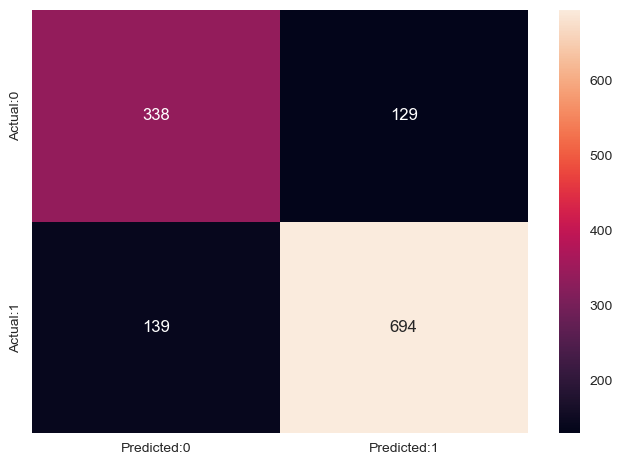

------------------------------------------------------------------
Classification Report for AdaBoost model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       467
           1       0.84      0.83      0.84       833

    accuracy                           0.79      1300
   macro avg       0.78      0.78      0.78      1300
weighted avg       0.79      0.79      0.79      1300

------------------------------------------------------------------
Classification Report for AdaBoost model with Train with test size=0.20
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1917
           1       1.00      1.00      1.00      3280

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197

---------------------------------------------------------------------

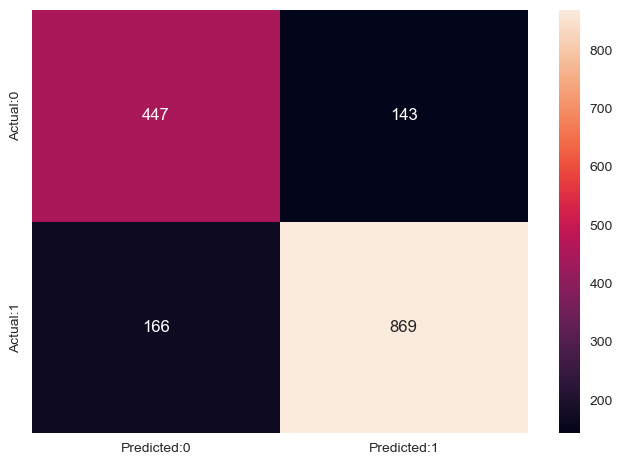

------------------------------------------------------------------
Classification Report for AdaBoost model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       590
           1       0.86      0.84      0.85      1035

    accuracy                           0.81      1625
   macro avg       0.79      0.80      0.80      1625
weighted avg       0.81      0.81      0.81      1625

------------------------------------------------------------------
Classification Report for AdaBoost model with Train with test size=0.25
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1794
           1       0.98      0.99      0.99      3078

    accuracy                           0.98      4872
   macro avg       0.98      0.98      0.98      4872
weighted avg       0.98      0.98      0.98      4872

---------------------------------------------------------------------

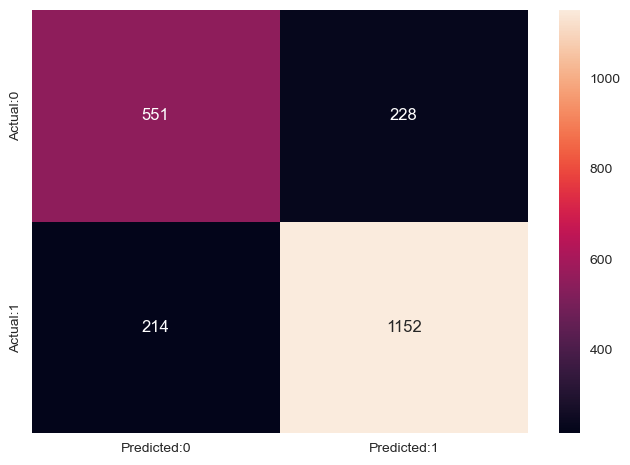

------------------------------------------------------------------
Classification Report for AdaBoost model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       779
           1       0.83      0.84      0.84      1366

    accuracy                           0.79      2145
   macro avg       0.78      0.78      0.78      2145
weighted avg       0.79      0.79      0.79      2145

------------------------------------------------------------------
Classification Report for AdaBoost model with Train with test size=0.33
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1605
           1       1.00      1.00      1.00      2747

    accuracy                           1.00      4352
   macro avg       1.00      1.00      1.00      4352
weighted avg       1.00      1.00      1.00      4352

---------------------------------------------------------------------

In [203]:
#Implementing AdaBoost using Best Parameter Setting
best_ada_20=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.3,n_estimators=500)
ada_20=best_ada_20.fit(X_train_20,y_train_20)
print("Best AdaBoost Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for AdaBoost with the best parameter settings with test size=0.20")
confuse_mat(ada_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Test with test size=0.20")
report=test_report(ada_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Train with test size=0.20")
test_repo=train_report(ada_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_ada_25=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.2,n_estimators=500)
ada_25=best_ada_25.fit(X_train,y_train)
print("Best AdaBoost Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for AdaBoost with the best parameter settings with test size=0.25")
confuse_mat(ada_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Test with test size=0.25")
report=test_report(ada_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Train with test size=0.25")
test_repo=train_report(ada_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_ada_33=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.3,n_estimators=500)
ada_33=best_ada_33.fit(X_train_33,y_train_33)
print("Best AdaBoost Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for AdaBoost with the best parameter settings with test size=0.33")
confuse_mat(ada_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Test with test size=0.33")
report=test_report(ada_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Train with test size=0.33")
test_repo=train_report(ada_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")


ROC curve and AUC score for test_size=0.20


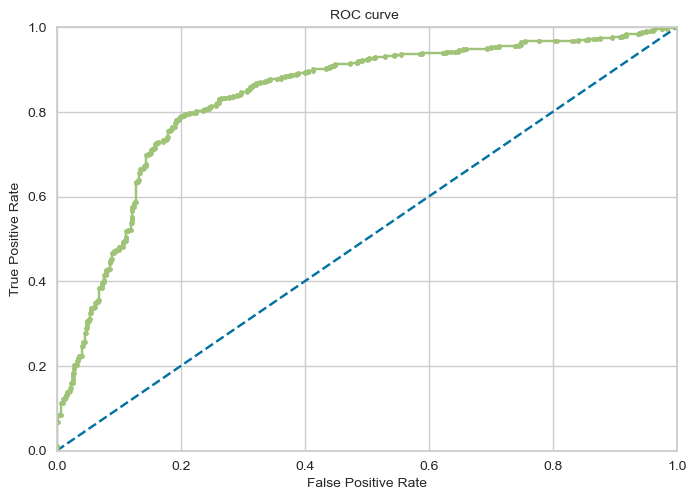

No Skill: ROC AUC=0.500
AdaBoost : ROC AUC=0.835
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.25


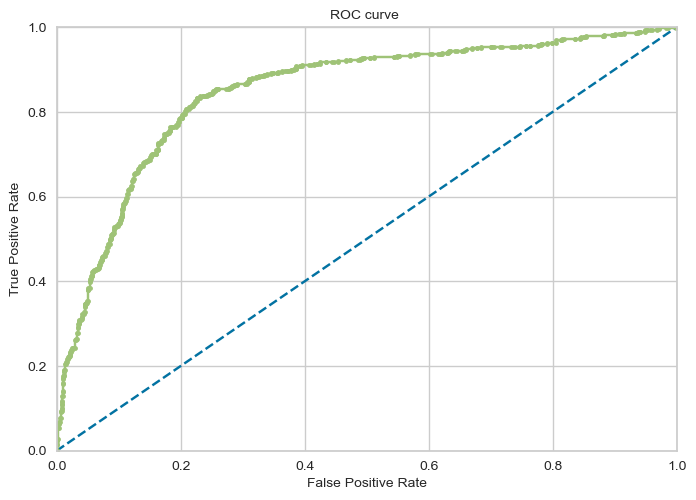

No Skill: ROC AUC=0.500
AdaBoost : ROC AUC=0.848
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.33


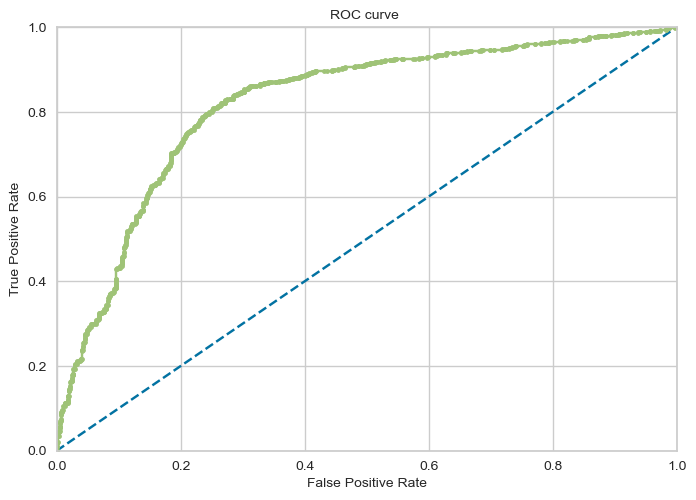

No Skill: ROC AUC=0.500
AdaBoost : ROC AUC=0.820


In [204]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(ada_20,"AdaBoost",0.20)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.25")
roc_auc(ada_25,"AdaBoost",0.25)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.33")
roc_auc(ada_33,"AdaBoost",0.33)

In [272]:
f_p_r(ada_25,0.25,"AdaBoost")

With test_size=0.25 for  AdaBoost  Recall: 0.7986203226070581
With test_size=0.25 for  AdaBoost  f1 score: 0.7960947655287771
With test_size=0.25 for  AdaBoost  precision: 0.7939481523512306


In [221]:
#Decision Tree Classifier
dt_model=DecisionTreeClassifier()
split_criteria=['gini','entropy']
depth=[4,6,5,10,12,18]
max_features=['sqrt','log2']
MinSamplesSplit= [4,6,8,10,12]
Min_Samples_Leaf= [4,6,8,10,12]
Max_Leaf_Nodes= [4,6,8,10,12]
dt_grid=dict(criterion=split_criteria,max_depth=depth,max_features=max_features,min_samples_split=MinSamplesSplit,min_samples_leaf=Min_Samples_Leaf,max_leaf_nodes=Max_Leaf_Nodes)
dtClf_20=GridSearchCV(dt_model,param_grid=dt_grid,cv=10)
dtClf_20.fit(X_train_20,y_train_20)
print("DT Model working with test size=0.20")
print("-------------------------------------------")
params_combine_dt_20=pd.concat([pd.DataFrame(dtClf_20.cv_results_["params"]),pd.DataFrame(dtClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_dt_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",dtClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",dtClf_20.best_score_)
print("--------------------------------------------------------------------------------------")
dtClf_25=GridSearchCV(dt_model,param_grid=dt_grid,cv=10)
dtClf_25.fit(X_train,y_train)
print("DT Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_dt_25=pd.concat([pd.DataFrame(dtClf_25.cv_results_["params"]),pd.DataFrame(dtClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_dt_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",dtClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",dtClf_25.best_score_)
print("--------------------------------------------------------------------------------------")
dtClf_33=GridSearchCV(dt_model,param_grid=dt_grid,cv=10)
dtClf_33.fit(X_train_33,y_train_33)
print("DT Model working with test size=0.33")
print("-------------------------------------------")
params_combine_dt_33=pd.concat([pd.DataFrame(dtClf_33.cv_results_["params"]),pd.DataFrame(dtClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_dt_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",dtClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",dtClf_33.best_score_)
print("--------------------------------------------------------------------------------------")

DT Model working with test size=0.20
-------------------------------------------
     criterion  max_depth max_features  max_leaf_nodes  min_samples_leaf  \
0         gini          4         sqrt               4                 4   
1         gini          4         sqrt               4                 4   
2         gini          4         sqrt               4                 4   
3         gini          4         sqrt               4                 4   
4         gini          4         sqrt               4                 4   
...        ...        ...          ...             ...               ...   
2995   entropy         18         log2              12                12   
2996   entropy         18         log2              12                12   
2997   entropy         18         log2              12                12   
2998   entropy         18         log2              12                12   
2999   entropy         18         log2              12                12   

      

Best DT Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for DT with the best parameter settings with test size=0.20


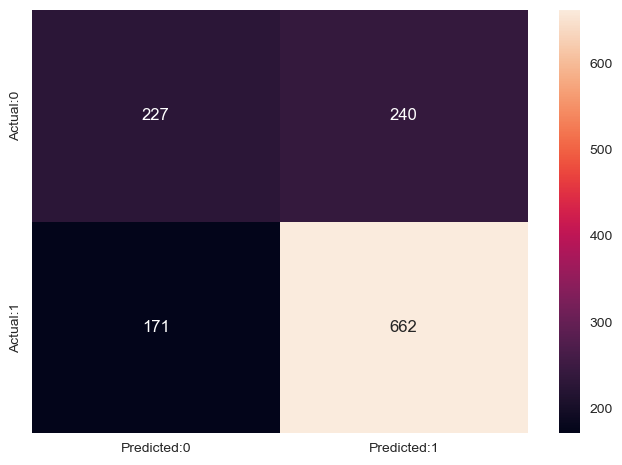

------------------------------------------------------------------
Classification Report for DT model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.57      0.49      0.52       467
           1       0.73      0.79      0.76       833

    accuracy                           0.68      1300
   macro avg       0.65      0.64      0.64      1300
weighted avg       0.68      0.68      0.68      1300

------------------------------------------------------------------
Classification Report for DT model with Train with test size=0.20
              precision    recall  f1-score   support

           0       0.61      0.51      0.56      1917
           1       0.74      0.81      0.77      3280

    accuracy                           0.70      5197
   macro avg       0.67      0.66      0.67      5197
weighted avg       0.69      0.70      0.69      5197

---------------------------------------------------------------------------------

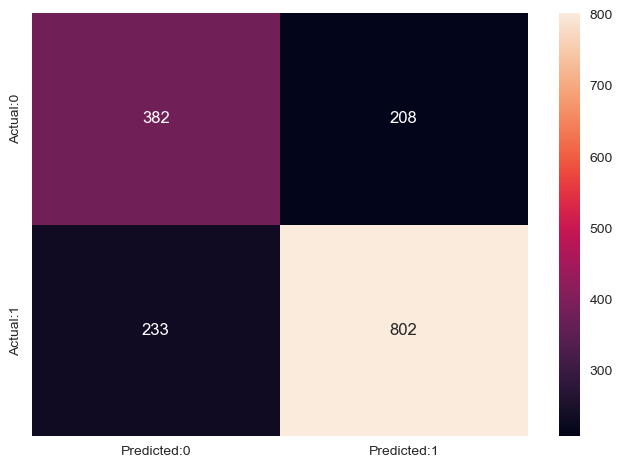

------------------------------------------------------------------
Classification Report for DT model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       590
           1       0.79      0.77      0.78      1035

    accuracy                           0.73      1625
   macro avg       0.71      0.71      0.71      1625
weighted avg       0.73      0.73      0.73      1625

------------------------------------------------------------------
Classification Report for DT model with Train with test size=0.25
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1794
           1       0.79      0.80      0.79      3078

    accuracy                           0.74      4872
   macro avg       0.72      0.72      0.72      4872
weighted avg       0.74      0.74      0.74      4872

---------------------------------------------------------------------------------

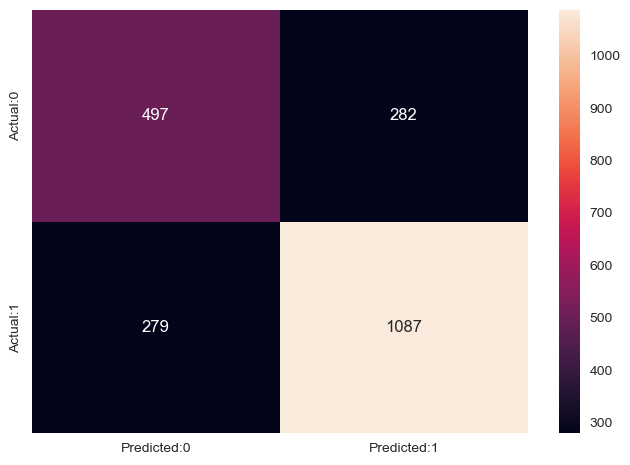

------------------------------------------------------------------
Classification Report for DT model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       779
           1       0.79      0.80      0.79      1366

    accuracy                           0.74      2145
   macro avg       0.72      0.72      0.72      2145
weighted avg       0.74      0.74      0.74      2145

------------------------------------------------------------------
Classification Report for DT model with Train with test size=0.33
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1605
           1       0.80      0.80      0.80      2747

    accuracy                           0.75      4352
   macro avg       0.73      0.73      0.73      4352
weighted avg       0.75      0.75      0.75      4352

---------------------------------------------------------------------------------

In [241]:
#Decision Tree using the best parameter setting
best_dt_20=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='sqrt',max_leaf_nodes=12,min_samples_leaf=10,min_samples_split=6)
dt_20=best_dt_20.fit(X_train_20,y_train_20)
print("Best DT Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for DT with the best parameter settings with test size=0.20")
confuse_mat(dt_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for DT model with Test with test size=0.20")
report=test_report(dt_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for DT model with Train with test size=0.20")
test_repo=train_report(dt_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_dt_25=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt',max_leaf_nodes=10,min_samples_leaf=4,min_samples_split=6)
dt_25=best_dt_25.fit(X_train,y_train)
print("Best DT Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for DT with the best parameter settings with test size=0.25")
confuse_mat(dt_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for DT model with Test with test size=0.25")
report=test_report(dt_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for DT model with Train with test size=0.25")
test_repo=train_report(dt_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_dt_33=DecisionTreeClassifier(criterion='gini',max_depth=10,max_features='sqrt',max_leaf_nodes=10,min_samples_leaf=6,min_samples_split=8)
dt_33=best_dt_33.fit(X_train_33,y_train_33)
print("Best DT Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for DT with the best parameter settings with test size=0.33")
confuse_mat(dt_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for DT model with Test with test size=0.33")
report=test_report(dt_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for DT model with Train with test size=0.33")
test_repo=train_report(dt_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")



ROC curve and AUC score for test_size=0.20


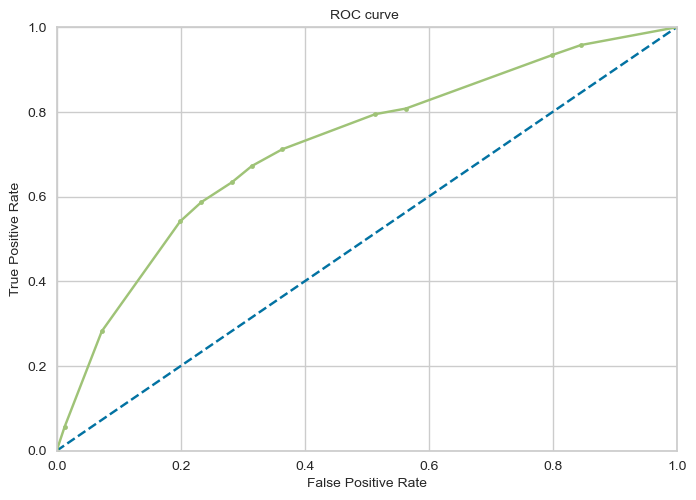

No Skill: ROC AUC=0.500
DT : ROC AUC=0.720
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.25


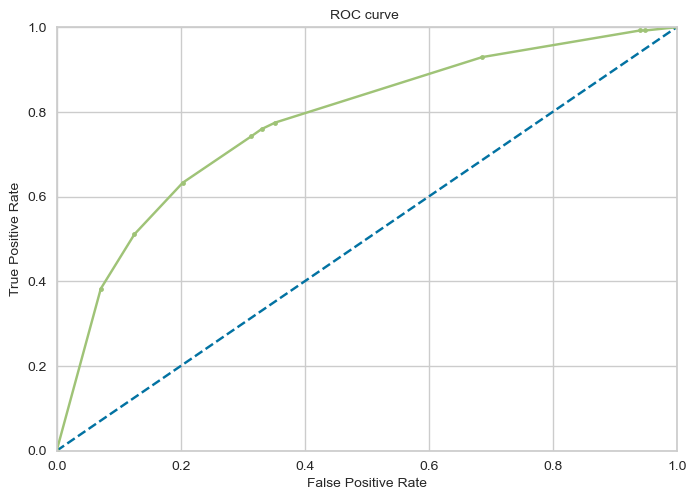

No Skill: ROC AUC=0.500
DT : ROC AUC=0.776
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.33


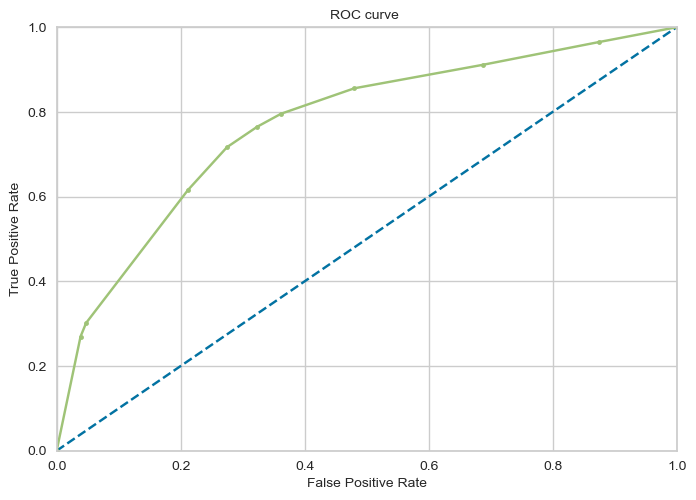

No Skill: ROC AUC=0.500
DT : ROC AUC=0.771


In [244]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(dt_20,"DT",0.20)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.25")
roc_auc(dt_25,"DT",0.25)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.33")
roc_auc(dt_33,"DT",0.33)

In [271]:
f_p_r(dt_25,0.25,"Decision Tree")

With test_size=0.25 for  Decision Tree  Recall: 0.711168427085892
With test_size=0.25 for  Decision Tree  f1 score: 0.7091884872525845
With test_size=0.25 for  Decision Tree  precision: 0.7075988086613539


In [252]:
#Gradient Boosting
# Since GB was taking a lot of time to compute. 
# I ran each of the test-sizes separately so as to reduce the computation time.
GB_model=GradientBoostingClassifier()
learning_rate=[0.3,0.5,0.7]
n_estimators=[20,40,70,90]  
max_depth=[2,4,6,10]
min_samples_split=[4,6,10]
min_samples_leaf=[4,6,10]
gb_grid=dict(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
GBClf_20=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)
GBClf_20.fit(X_train_20,y_train_20)
print("GB Model working with test size=0.20")
print("-------------------------------------------")
params_combine_GB_20=pd.concat([pd.DataFrame(GBClf_20.cv_results_["params"]),pd.DataFrame(GBClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",GBClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",GBClf_20.best_score_)
print("--------------------------------------------------------------------------------------") 
'''GBClf_25=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)
GBClf_25.fit(X_train,y_train)
print("GB Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_GB_25=pd.concat([pd.DataFrame(GBClf_25.cv_results_["params"]),pd.DataFrame(GBClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",GBClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",GBClf_25.best_score_)
print("--------------------------------------------------------------------------------------") '''
''' GBClf_33=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)
GBClf_33.fit(X_train_33,y_train_33)
print("GB Model working with test size=0.33")
print("-------------------------------------------")
params_combine_GB_33=pd.concat([pd.DataFrame(GBClf_33.cv_results_["params"]),pd.DataFrame(GBClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",GBClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",GBClf_33.best_score_)
print("--------------------------------------------------------------------------------------") '''

GB Model working with test size=0.20
-------------------------------------------
     learning_rate  max_depth  min_samples_leaf  min_samples_split  \
0              0.3          2                 4                  4   
1              0.3          2                 4                  4   
2              0.3          2                 4                  4   
3              0.3          2                 4                  4   
4              0.3          2                 4                  6   
..             ...        ...               ...                ...   
427            0.7         10                10                  6   
428            0.7         10                10                 10   
429            0.7         10                10                 10   
430            0.7         10                10                 10   
431            0.7         10                10                 10   

     n_estimators  Accuracy  
0              20  0.756593  
1              40 

' GBClf_33=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)\nGBClf_33.fit(X_train_33,y_train_33)\nprint("GB Model working with test size=0.33")\nprint("-------------------------------------------")\nparams_combine_GB_33=pd.concat([pd.DataFrame(GBClf_33.cv_results_["params"]),pd.DataFrame(GBClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)\nprint(params_combine_GB_33)\nprint("-------------------------------------------")\nprint("Best parameter setting with test size=0.33: ",GBClf_33.best_params_)\nprint("Best accuracy score with test size=0.33: ",GBClf_33.best_score_)\nprint("--------------------------------------------------------------------------------------") '

Best GB Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for GB with the best parameter settings with test size=0.20


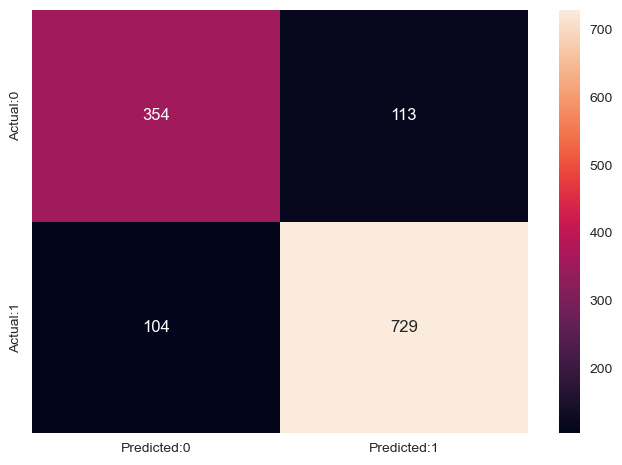

------------------------------------------------------------------
Classification Report for GB model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       467
           1       0.87      0.88      0.87       833

    accuracy                           0.83      1300
   macro avg       0.82      0.82      0.82      1300
weighted avg       0.83      0.83      0.83      1300

------------------------------------------------------------------
Classification Report for GB model with Train with test size=0.20
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1917
           1       1.00      1.00      1.00      3280

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197

---------------------------------------------------------------------------------

'best_gb_33=GradientBoostingClassifier(learning_rate=0.3,max_depth=4,min_samples_leaf=2,min_samples_split=2,n_estimators=70)\ngb_33=best_gb_33.fit(X_train_33,y_train_33)\nprint("Best GB Model working with test size=0.33")\nprint("------------------------------------------------------------------")\nprint("Confusion matrix for GB with the best parameter settings with test size=0.33")\nconfuse_mat(gb_33,0.33)\nprint("------------------------------------------------------------------")\nprint("Classification Report for GB model with Test with test size=0.33")\nreport=test_report(gb_33,0.33)\nprint(report)\nprint("------------------------------------------------------------------")\nprint("Classification Report for GB model with Train with test size=0.33")\ntest_repo=train_report(gb_33,0.33)\nprint(test_repo)\nprint("--------------------------------------------------------------------------------------") '

In [266]:
best_gb_20=GradientBoostingClassifier(learning_rate=0.3,max_depth=10,min_samples_leaf=10,min_samples_split=4,n_estimators=70)
gb_20=best_gb_20.fit(X_train_20,y_train_20)
print("Best GB Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for GB with the best parameter settings with test size=0.20")
confuse_mat(gb_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Test with test size=0.20")
report=test_report(gb_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Train with test size=0.20")
test_repo=train_report(gb_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------") 
'''
best_gb_25=GradientBoostingClassifier(learning_rate=0.3,max_depth=10,min_samples_leaf=10,min_samples_split=4,n_estimators=70)
gb_25=best_gb_25.fit(X_train,y_train)
print("Best GB Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for GB with the best parameter settings with test size=0.25")
confuse_mat(gb_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Test with test size=0.25")
report=test_report(gb_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Train with test size=0.25")
test_repo=train_report(gb_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------") '''
'''best_gb_33=GradientBoostingClassifier(learning_rate=0.3,max_depth=4,min_samples_leaf=2,min_samples_split=2,n_estimators=70)
gb_33=best_gb_33.fit(X_train_33,y_train_33)
print("Best GB Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for GB with the best parameter settings with test size=0.33")
confuse_mat(gb_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Test with test size=0.33")
report=test_report(gb_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Train with test size=0.33")
test_repo=train_report(gb_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------") '''



In [270]:
f_p_r(gb_20,0.20,"Gradient Boosting")

With test_size=0.20 for  Gradient Boosting  Recall: 0.8165900193053667
With test_size=0.20 for  Gradient Boosting  f1 score: 0.8179265832997176
With test_size=0.20 for  Gradient Boosting  precision: 0.819360744328849


ROC curve and AUC score for test_size=0.20


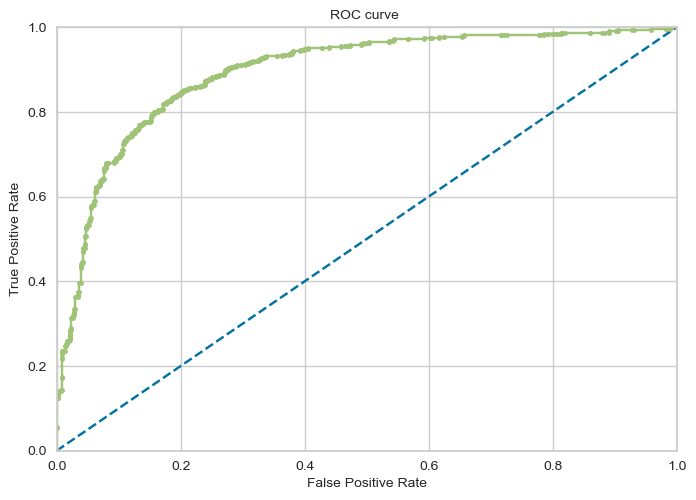

No Skill: ROC AUC=0.500
Gradient Boosting : ROC AUC=0.893


In [268]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(gb_20,"Gradient Boosting",0.20)

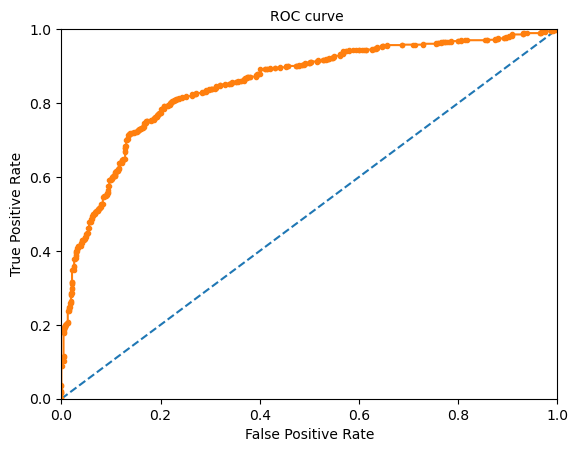

No Skill: ROC AUC=0.500
gb : ROC AUC=0.849


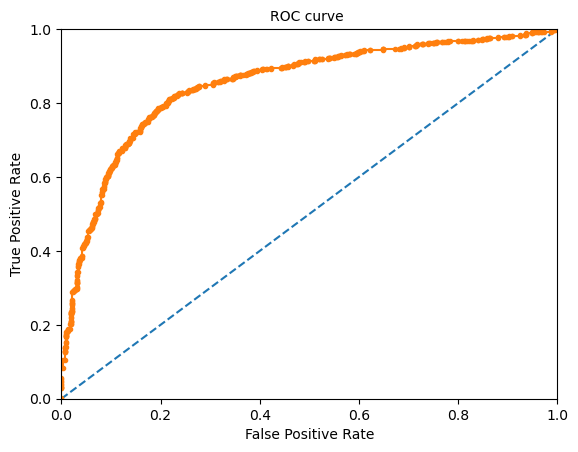

No Skill: ROC AUC=0.500
gb : ROC AUC=0.850


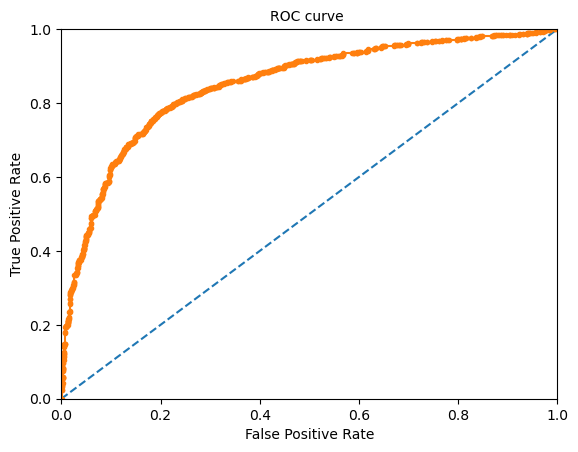

No Skill: ROC AUC=0.500
gb : ROC AUC=0.849


In [152]:
roc_auc(gb_20,"gb",0.20)
roc_auc(gb_25,"gb",0.25)
roc_auc(gb_33,"gb",0.33)

In [4]:
#KNN
knn_model=KNeighborsClassifier()
k_vals=np.arange(1,30,2)
metrics=['manhattan','euclidean','hamming']
algos=['ball_tree','kd_tree','brute']
weights=['uniform','distance']
knn_grid=dict(n_neighbors=k_vals,metric=metrics,algorithm=algos,weights=weights)
KNNClf_20=GridSearchCV(knn_model,param_grid=knn_grid,cv=10)
KNNClf_20.fit(X_train_20,y_train_20)
print("KNN Model working with test size=0.20")
print("-------------------------------------------")
params_combine_knn_20=pd.concat([pd.DataFrame(KNNClf_20.cv_results_["params"]),pd.DataFrame(KNNClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_knn_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",KNNClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",KNNClf_20.best_score_)
print("--------------------------------------------------------------------------------------")
KNNClf_25=GridSearchCV(knn_model,param_grid=knn_grid,cv=10)
KNNClf_25.fit(X_train,y_train)
print("KNN Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_knn=pd.concat([pd.DataFrame(KNNClf_25.cv_results_["params"]),pd.DataFrame(KNNClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_knn)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",KNNClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",KNNClf_25.best_score_)
print("--------------------------------------------------------------------------------------")
KNNClf_33=GridSearchCV(knn_model,param_grid=knn_grid,cv=10)
KNNClf_33.fit(X_train_33,y_train_33)
print("KNN Model working with test size=0.33")
print("-------------------------------------------")
params_combine_knn=pd.concat([pd.DataFrame(KNNClf_33.cv_results_["params"]),pd.DataFrame(KNNClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_knn)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",KNNClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",KNNClf_33.best_score_)
print("--------------------------------------------------------------------------------------")

KNN Model working with test size=0.20
-------------------------------------------
     algorithm     metric  n_neighbors   weights  Accuracy
0    ball_tree  manhattan            1   uniform  0.791230
1    ball_tree  manhattan            1  distance  0.791230
2    ball_tree  manhattan            3   uniform  0.758709
3    ball_tree  manhattan            3  distance  0.799691
4    ball_tree  manhattan            5   uniform  0.755628
..         ...        ...          ...       ...       ...
265      brute    hamming           25  distance  0.752555
266      brute    hamming           27   uniform  0.684056
267      brute    hamming           27  distance  0.755439
268      brute    hamming           29   uniform  0.685977
269      brute    hamming           29  distance  0.757745

[270 rows x 5 columns]
-------------------------------------------
Best parameter setting with test size=0.20:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best 

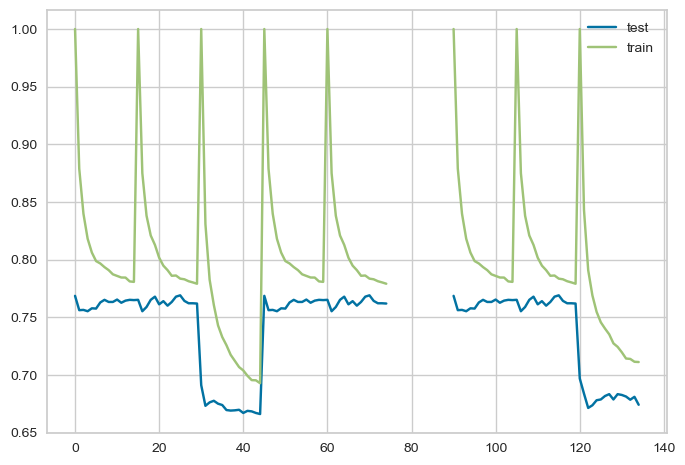

In [188]:
KNNClf_33=GridSearchCV(knn_model,param_grid=knn_grid,cv=5,return_train_score=True)
KNNClf_33.fit(X_train_33,y_train_33)
'''print("KNN Model working with test size=0.33")
print("-------------------------------------------")
params_combine_knn=pd.concat([pd.DataFrame(KNNClf_33.cv_results_["params"]),pd.DataFrame(KNNClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_knn)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",KNNClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",KNNClf_33.best_score_)
print("--------------------------------------------------------------------------------------") '''
test_scores = KNNClf_33.cv_results_['mean_test_score']
train_scores = KNNClf_33.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Best KNN Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for KNN with the best parameter settings with test size=0.20


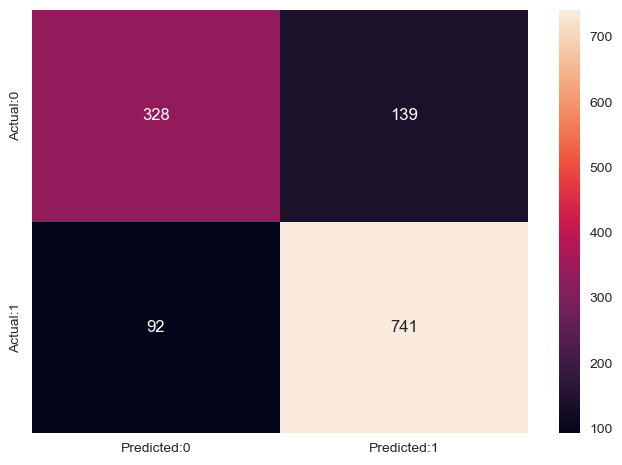

------------------------------------------------------------------
Classification Report for KNN model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       467
           1       0.84      0.89      0.87       833

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300

------------------------------------------------------------------
Classification Report for KNN model with Train with test size=0.20
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1917
           1       1.00      1.00      1.00      3280

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197

-------------------------------------------------------------------------------

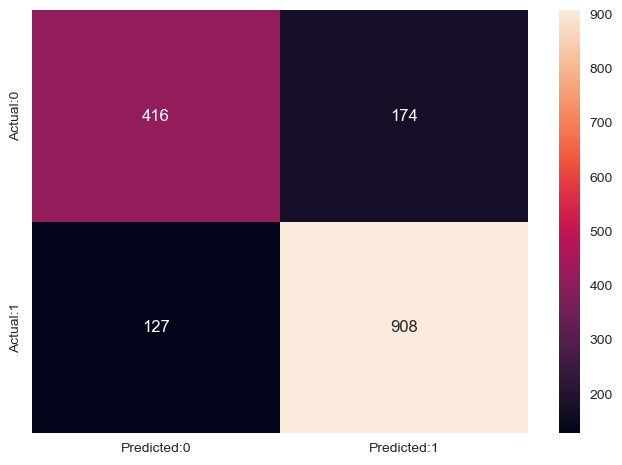

------------------------------------------------------------------
Classification Report for KNN model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.77      0.71      0.73       590
           1       0.84      0.88      0.86      1035

    accuracy                           0.81      1625
   macro avg       0.80      0.79      0.80      1625
weighted avg       0.81      0.81      0.81      1625

------------------------------------------------------------------
Classification Report for KNN model with Train with test size=0.25
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1794
           1       1.00      1.00      1.00      3078

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872

-------------------------------------------------------------------------------

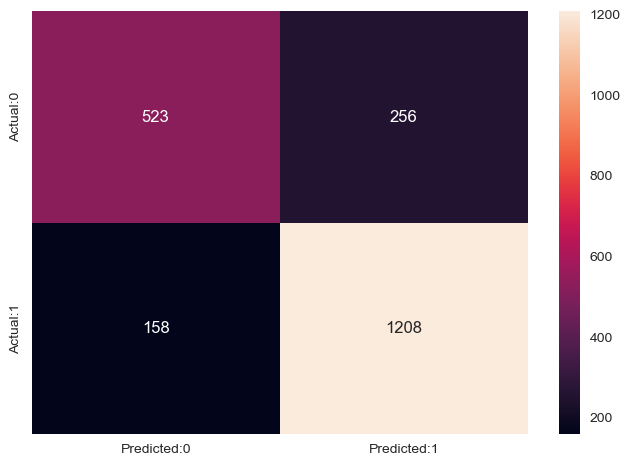

------------------------------------------------------------------
Classification Report for KNN model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       779
           1       0.83      0.88      0.85      1366

    accuracy                           0.81      2145
   macro avg       0.80      0.78      0.79      2145
weighted avg       0.80      0.81      0.80      2145

------------------------------------------------------------------
Classification Report for KNN model with Train with test size=0.33
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1605
           1       1.00      1.00      1.00      2747

    accuracy                           1.00      4352
   macro avg       1.00      1.00      1.00      4352
weighted avg       1.00      1.00      1.00      4352

-------------------------------------------------------------------------------

In [5]:

best_knn_20=KNeighborsClassifier(n_neighbors=19,metric='manhattan',algorithm='ball_tree',weights='distance')
knn_20=best_knn_20.fit(X_train_20,y_train_20)
print("Best KNN Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for KNN with the best parameter settings with test size=0.20")
confuse_mat(knn_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for KNN model with Test with test size=0.20")
report=test_report(knn_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for KNN model with Train with test size=0.20")
test_repo=train_report(knn_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_knn_25=KNeighborsClassifier(n_neighbors=15,metric='hamming',algorithm='ball_tree',weights='distance')
knn_25=best_knn_25.fit(X_train,y_train)
print("Best KNN Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for KNN with the best parameter settings with test size=0.25")
confuse_mat(knn_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for KNN model with Test with test size=0.25")
report=test_report(knn_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for KNN model with Train with test size=0.25")
test_repo=train_report(knn_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_knn_33=KNeighborsClassifier(n_neighbors=13,metric='manhattan',algorithm='ball_tree',weights='distance')
knn_33=best_knn_33.fit(X_train_33,y_train_33)
print("Best KNN Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for KNN with the best parameter settings with test size=0.33")
confuse_mat(knn_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for KNN model with Test with test size=0.33")
report=test_report(knn_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for KNN model with Train with test size=0.33")
test_repo=train_report(knn_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")


ROC curve and AUC score for test_size=0.20


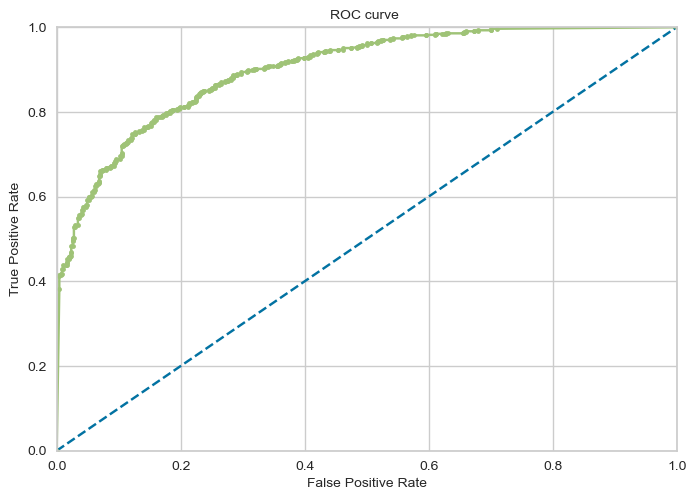

No Skill: ROC AUC=0.500
KNN : ROC AUC=0.899
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.25


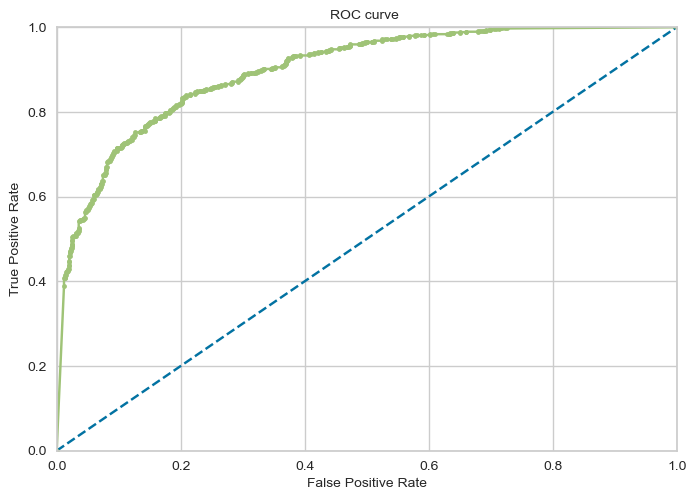

No Skill: ROC AUC=0.500
KNN : ROC AUC=0.898
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.33


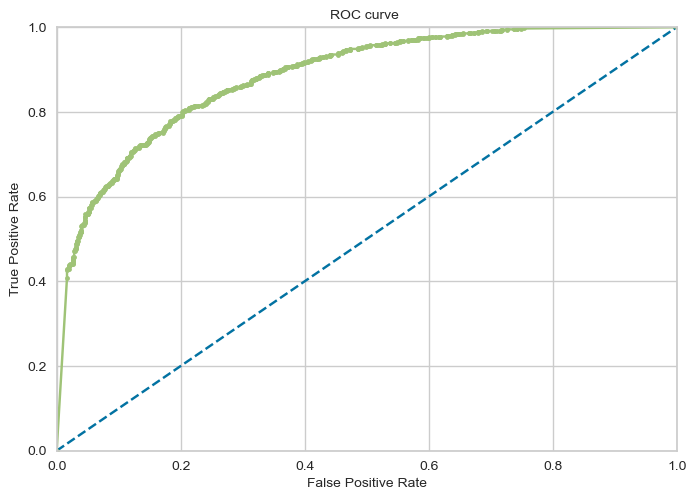

No Skill: ROC AUC=0.500
KNN : ROC AUC=0.884


In [6]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(knn_20,"KNN",0.20)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.25")
roc_auc(knn_25,"KNN",0.25)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.33")
roc_auc(knn_33,"KNN",0.33)

In [7]:
f_p_r(knn_25,0.25,"KNN")

With test_size=0.25 for  KNN  Recall: 0.7911897158765251
With test_size=0.25 for  KNN  f1 score: 0.7960756470233611
With test_size=0.25 for  KNN  precision: 0.8026504358956029


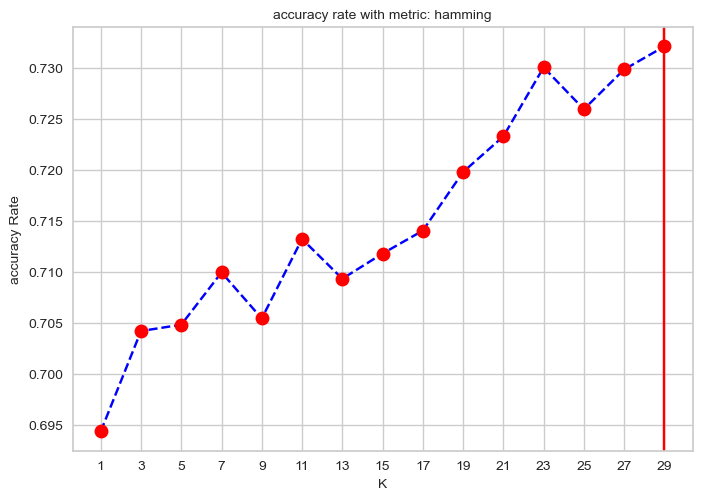

In [15]:
accuracy_rate = []
for i in np.arange(1,30,2):
    knn = KNeighborsClassifier(i, metric = 'hamming',algorithm='ball_tree',weights='distance')
    score = cross_val_score(knn, X_train, y_train, cv = 10)
    score = score.mean()
    accuracy_rate.append(score)
plt.plot(range(1,30,2), accuracy_rate,color ='blue',linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 10)
plt.title('accuracy rate with metric: hamming', fontsize = 10)
plt.xlabel('K', fontsize = 10)
plt.ylabel('accuracy Rate', fontsize = 10)
plt.xticks(np.arange(1, 30, step = 2))
plt.axvline(x = 29, color = 'red')
plt.show()

Best KNN Model working with test size=0.25
------------------------------------------------------------------
Confusion matrix for KNN with the best parameter settings with test size=0.25


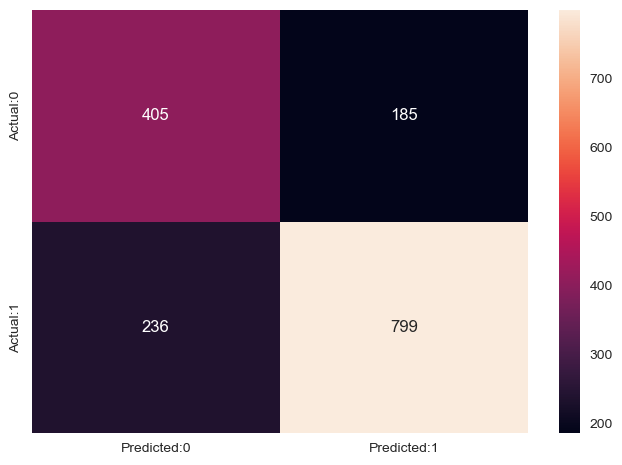

------------------------------------------------------------------
Classification Report for KNN model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       590
           1       0.81      0.77      0.79      1035

    accuracy                           0.74      1625
   macro avg       0.72      0.73      0.72      1625
weighted avg       0.75      0.74      0.74      1625

------------------------------------------------------------------
Classification Report for KNN model with Train with test size=0.25
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1794
           1       1.00      1.00      1.00      3078

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872

-------------------------------------------------------------------------------

In [14]:
best_knn_25=KNeighborsClassifier(n_neighbors=29,metric='hamming',algorithm='ball_tree',weights='distance')
knn_25=best_knn_25.fit(X_train,y_train)
print("Best KNN Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for KNN with the best parameter settings with test size=0.25")
confuse_mat(knn_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for KNN model with Test with test size=0.25")
report=test_report(knn_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for KNN model with Train with test size=0.25")
test_repo=train_report(knn_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")